## Python version + Detailed value

### Importing useful libraries

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### A simple function for convert bond price

In [2]:
def convert_bond_price(stock_price, conversion_ratio, face_value, volatility, risk_free_rate, time_to_maturity):
    """
    Return bond price using the Black-Scholes model.
    """
    
    # Black-Scholes model parameters
    S = stock_price          # Current stock price
    CR = conversion_ratio    # Conversion ratio (number of shares per bond)
    F = face_value           # Face value of the convertible bond
    sigma = volatility       # Volatility of the underlying stock
    r = risk_free_rate       # Risk-free interest rate
    T = time_to_maturity     # Time to maturity in years

    # Black-Scholes formula for convertible bond price
    d1 = (np.log(S / (F / CR)) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Calculate the price of the convertible bond
    bond_price = S * CR * norm.cdf(d1) - F * np.exp(-r * T) * norm.cdf(d2)

    return bond_price

## An example of application

In [3]:
stock_price = 100.0          # Current stock price
conversion_ratio = 5         # Conversion ratio (number of shares per bond)
face_value = 1000.0          # Face value of the convertible bond
volatility = 0.2             # Volatility of the underlying stock
risk_free_rate = 0.03        # Risk-free interest rate
time_to_maturity = 2.0       # Time to maturity in years
risk_free_rate = 0.03

In [4]:
list_bond_prices = []
list_risk = []

In [6]:
for i in range(max(0, int(risk_free_rate*100 - 3)), min(100, int(risk_free_rate*100 + 3))):
    risk_free_rate = i/100
    bond_price = convert_bond_price(stock_price, conversion_ratio, face_value, volatility, risk_free_rate, time_to_maturity)
    list_bond_prices.append(bond_price)
    list_risk.append(risk_free_rate)

In [7]:
#print(f"The price of the convertible bond is: {list_bond_price:.2f}")
print(list_bond_prices)

[0.4627251198077431, 0.567467062684325, 0.6929797434056981, 0.842699292752199, 1.020486347951664, 1.2306509596125146]


## Plot figures

Text(0, 0.5, 'Bond prices')

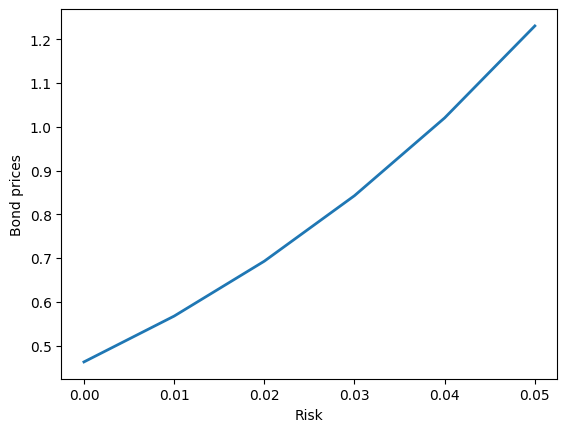

In [9]:
plt.plot(list_risk, list_bond_prices, linewidth=2.0)
plt.xlabel('Risk')
plt.ylabel('Bond prices')